In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')

In [248]:
test = pd.read_csv ('/Users/erjonhome/Desktop/test.csv')
train = pd.read_csv ('/Users/erjonhome/Desktop/train.csv')


In [249]:
train.isnull().sum()[0:90]

Id                 0
SalePrice          0
MSSubClass         0
MSZoning           0
LotFrontage      259
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice.1        0
Length: 82, dtype: int64

In [250]:
train['LotFrontage'].value_counts().head()

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64

In [251]:
# Examine null values for Lot Frontage
lot_nulls = train[train['LotFrontage'].isna()] 
lot_nulls.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice.1
7,8,175110.9565,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,159672.0176,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,150891.6382,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,185034.6289,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,185855.3009,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000


In [252]:
# Group these lots
grouped_lots = train .groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})
grouped_lots

,LotFrontage
LotConfig,
Corner,84.039801
CulDSac,59.911111
FR2,63.515152
FR3,70.750000
Inside,67.715686


In [253]:
#replace np.nan with average for lot_config of that type
train.loc[(train['LotFrontage'].isna()) & (train['LotConfig'] == 'Corner'), 'LotFrontage'] = 84.03
train.loc[(train['LotFrontage'].isna()) & (train['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 59.91        
train.loc[(train['LotFrontage'].isna()) & (train['LotConfig'] == 'FR2'), 'LotFrontage'] = 63.52        
train.loc[(train['LotFrontage'].isna()) & (train['LotConfig'] == 'FR3'), 'LotFrontage'] = 70.75        
train.loc[(train['LotFrontage'].isna()) & (train['LotConfig'] == 'Inside'), 'LotFrontage'] = 67.71

In [254]:
train['LotFrontage'].isna().sum()

0

In [255]:
# looking at outliers
train['LotFrontage'].sort_values().tail()

197     174.0
231     174.0
1127    182.0
1298    313.0
934     313.0
Name: LotFrontage, dtype: float64

In [256]:
x_frontage_maybe_drop = train[train['LotFrontage'] == 313]
x_frontage_maybe_drop

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice.1
934,935,207348.8119,20,RL,313.0,27650,Pave,NaN,IR2,HLS,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,175231.1897,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [257]:
train['Alley'].isnull().sum()

1369

In [258]:
train['Alley'] = train['Alley'].replace(np.nan, 'NA')

In [259]:
train['Alley'].value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [260]:
train['MasVnrType'] = train['MasVnrType'].replace(np.nan, 'None') #replace masonry np.nan with None
train['MasVnrArea'] = train['MasVnrArea'].replace(np.nan, 0) #replace masonry np.nan with 0

In [261]:
train['BsmtQual'].value_counts() #missing NA for no basement

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [262]:
train['BsmtQual'].isnull().sum()

37

In [263]:
train['BsmtCond'].isnull().sum()

37

In [264]:
train['BsmtExposure'].isnull().sum()

38

In [265]:
train['BsmtFinType1'].isnull().sum()

37

In [266]:
train['BsmtFinSF1'].isnull().sum()

0

In [267]:
train['BsmtFinType2'].isnull().sum()

38

In [268]:
train['BsmtFinSF2'].isnull().sum()

0

In [269]:
train['BsmtUnfSF'].isnull().sum()

0

In [270]:
train['TotalBsmtSF'].isnull().sum()

0

In [271]:
train['BsmtFullBath'].isnull().sum()

0

In [272]:
train['BsmtHalfBath'].isnull().sum()

0

In [273]:
#these all receive an NA if no basement
basement_to_na = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
 'BsmtFinType2']


In [274]:
#these receive 0sqft if basement is NA
basement_to_zero = ['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFullBath',
 'BsmtHalfBath']

In [275]:
 #Setting sqft value to zero.
for i in basement_to_na:
    train[i] = train[i].replace(np.nan, 'NA')
train[train['BsmtFinSF1'].isna()]

#set basement sqft to 0 IF basement is NA    
for i in basement_to_zero:
    train[i] = train[i].replace(np.nan, 0)

In [276]:
print(train['FireplaceQu'].isnull().sum()) 
print(len(train['FireplaceQu']))

690
1460


In [277]:
train['FireplaceQu'] = train['FireplaceQu'].replace(np.nan, 'NA')

In [278]:
train['Fireplaces'] = train['Fireplaces'].replace(np.nan, 'NA')

In [279]:
print(train['FireplaceQu'].isnull().sum())

0


In [280]:
print(train['Fireplaces'].isnull().sum())

0


In [281]:
train[['GarageType','GarageFinish','GarageQual','GarageCond']].isnull().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [282]:
garage_to_na = ['GarageType','GarageFinish','GarageQual','GarageCond']

In [283]:
garage_to_0 = ['GarageYrBlt','GarageCars', 'GarageArea']

In [284]:
for i in garage_to_na:
    train[i] = train[i].replace(np.nan, 'NA')

In [285]:
train[(train['GarageYrBlt'].isna()) & (train['GarageType'] =='NA')]


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice.1
39,40,150306.3078,90,RL,65.00,6040,Pave,NA,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,191849.4391,190,RM,33.00,4456,Pave,NA,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,175182.9509,90,RL,72.00,10778,Pave,NA,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,157580.1776,50,C (all),105.00,8470,Pave,NA,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,181922.1526,20,RL,60.00,8070,Pave,NA,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,180983.4438,70,RM,50.00,5250,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,177560.2021,20,RL,84.03,8780,Pave,NA,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,137402.5699,180,RM,21.00,1533,Pave,NA,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,165086.7751,90,RL,60.00,9000,Pave,NA,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [286]:
for i in garage_to_0:
    train[i] = train[i].replace(np.nan, 0)

In [287]:
train[['GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt','GarageCars', 'GarageArea']].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [288]:
for i in train[(train['PoolQC'].isna()) & (train['PoolArea'] == 0)]:
    train['PoolQC'] = train['PoolQC'].replace(np.nan, 'NA')

In [289]:
print(train['PoolQC'].isnull().sum())

0


In [290]:
train['Fence'] = train['Fence'].replace(np.nan, 'NA')

In [291]:
print(train['Fence'].isnull().sum())

0


In [292]:
train['MiscFeature'].isnull().sum() 
for i in train[(train['MiscFeature'].isna()) & (train['MiscVal'] == 0)]:
    train['MiscFeature'] = train['MiscFeature'].replace(np.nan, 'NA')
train['MiscFeature'].isnull().sum() 

0

In [293]:
train['SalePrice'] = train['SalePrice'].replace(np.nan, 'NA')
train.isnull().sum()

Id               0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice.1      0
Length: 82, dtype: int64

In [294]:
# We will want to categorize these lists for further anaylsis

train_indexing = [['Id']]

train_ordinal = train[['SalePrice','LotShape','Utilities','LandSlope','OverallQual','OverallCond','ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional', 'FireplaceQu','GarageFinish', 'GarageQual','GarageCond','PavedDrive','PoolQC','Fence']]

In [295]:
train_nominal = train[['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType']]

In [296]:
train_catagorical = train[['Street','Alley', 'LotShape', 'LandContour','Utilities', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual', 'Functional', 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond', 'PavedDrive','PoolQC','Fence', 'MiscFeature','SaleType']]

In [297]:
train_numeric_catagory = train[['SalePrice','MSSubClass', 'MSZoning', 'OverallQual','OverallCond', 'MoSold'                ]]

In [298]:
train_numeric = train[['SalePrice','LotFrontage', 'LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea','MiscVal','YrSold']]


In [299]:
# The target variable
y = train['SalePrice']

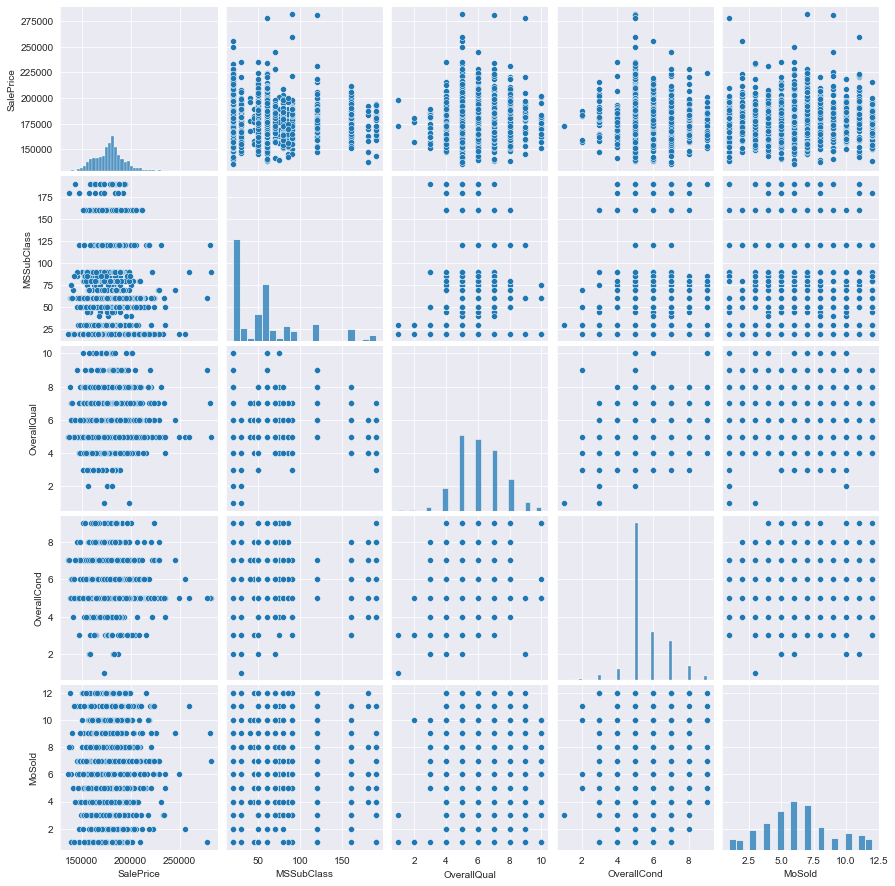

In [300]:

sns.pairplot(train_numeric_catagory)

In [301]:
train_ordinal.head()

,SalePrice,LotShape,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,169277.0525,Reg,AllPub,Gtl,7,5,Gd,TA,Gd,TA,...,SBrkr,Gd,Typ,NA,RFn,TA,TA,Y,NA,NA
1,187758.3940,Reg,AllPub,Gtl,6,8,TA,TA,Gd,TA,...,SBrkr,TA,Typ,TA,RFn,TA,TA,Y,NA,NA
2,183583.6836,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,TA,...,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NA,NA
3,179317.4775,IR1,AllPub,Gtl,7,5,TA,TA,TA,Gd,...,SBrkr,Gd,Typ,Gd,Unf,TA,TA,Y,NA,NA
4,150730.0800,IR1,AllPub,Gtl,8,5,Gd,TA,Gd,TA,...,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NA,NA


In [302]:
#Convert these to ordinal lists.
#columns to replace values in

train_ordinal_str_columns = train[['LotShape','Utilities','LandSlope','ExterQual', 
                 'ExterCond','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
                'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']]

#dictionary of values to replace

dict_ordinal = {
    #overall_qual, overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,heatingqc,kitchenqual
    #firplacequ,garage_qual,garage_cond,pool_qc,fence
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
     #lot_shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
    #utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,
    #land_slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
    #bsmt_exposure
    'Av': 3,
    'Mn': 2,
    'No': 1,
    #bsmtfin_type_1, bsmtfin_type_1
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    #Electrical
    'SBrkr':1,
    'FuseA':0,
    'FuseF':0,
    'FuseP':0,
    'Mix':0,
    #Functional
    'Typ':1,
    'Min1':0,
    'Min2':0,
    'Mod':0,
    'Maj1':0,
    'Maj2':0,
    'Sev':0,
    'Sal':0,
    #garage_finish    
    'Fin': 3,
    'RFn': 2,
    'Unf':1,
    #paved_drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
    #fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1   
}
#loop to get the job done
for i in train_ordinal_str_columns.columns:
    train.replace({i: dict_ordinal},inplace = True)

In [303]:
train[['LotShape','Utilities','LandSlope','ExterQual', 
                 'ExterCond','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
                'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']].head(5)

,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,4,4,3,4,3,4,3,1,6,1,...,1.0,4,1,0,2,3,3,2,0,0
1,4,4,3,3,3,4,3,4,5,1,...,1.0,3,1,3,2,3,3,2,0,0
2,3,4,3,4,3,4,3,2,6,1,...,1.0,4,1,3,2,3,3,2,0,0
3,3,4,3,3,3,3,4,1,5,1,...,1.0,4,1,4,1,3,3,2,0,0
4,3,4,3,4,3,4,3,3,6,1,...,1.0,4,1,3,2,3,3,2,0,0


In [304]:
train[['LotShape','Utilities','LandSlope','ExterQual', 
                 'ExterCond','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
                'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']].dtypes

LotShape          int64
Utilities         int64
LandSlope         int64
ExterQual         int64
ExterCond         int64
BsmtQual          int64
BsmtCond          int64
BsmtExposure      int64
BsmtFinType1      int64
BsmtFinType2      int64
HeatingQC         int64
Electrical      float64
KitchenQual       int64
Functional        int64
FireplaceQu       int64
GarageFinish      int64
GarageQual        int64
GarageCond        int64
PavedDrive        int64
PoolQC            int64
Fence             int64
dtype: object

In [305]:
#Drop this feature, isnt changing to integer
train.drop('Electrical', inplace=True, axis=1)

In [306]:
train[['LotShape','Utilities','LandSlope','ExterQual', 
                 'ExterCond','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
                'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']].dtypes

LotShape        int64
Utilities       int64
LandSlope       int64
ExterQual       int64
ExterCond       int64
BsmtQual        int64
BsmtCond        int64
BsmtExposure    int64
BsmtFinType1    int64
BsmtFinType2    int64
HeatingQC       int64
KitchenQual     int64
Functional      int64
FireplaceQu     int64
GarageFinish    int64
GarageQual      int64
GarageCond      int64
PavedDrive      int64
PoolQC          int64
Fence           int64
dtype: object

In [308]:
# bin neighboorhood into oridinal columns based on mean price
train['NeighborhoodOrder'] = train['Neighborhood']
train_ordinal_str_columns = train[['NeighborhoodOrder']]

dict_ordinal = {
    'MeadowV': 1,
    'IDOTRR' : 1,
    'BrDale' : 1,
    'OldTown': 1,
    'BrkSide': 1,
    'Edwards': 1,
    'SWISU': 1,
    'Landmrk':2,
    'Sawyer':2,
    'NPkVill':2,
    'Blueste':2,
    'NAmes':2,
    'Mitchel':2,
    'SawyerW':2,
    'Greens':3,
    'Gilbert':3,
    'NWAmes':3,
    'Blmngtn':3,
    'CollgCr':3,
    'Crawfor':3,
    'ClearCr':3,
    'Somerst':4,
    'Timber':4,
    'Veenker':4,
    'GrnHill':4,
    'StoneBr':4,
    'NoRidge':4,
    'NridgHt':4,
        }
#loop to get it right
for i in train_ordinal_str_columns.columns:
    train.replace({i: dict_ordinal},inplace = True)

In [309]:
train['SaleType'] = train['SaleType'].replace(np.nan, 'NA')

In [310]:
train['SaleType'] = train['SaleType'].dropna()

In [311]:
train['SalePrice'] = train['SalePrice'].dropna()

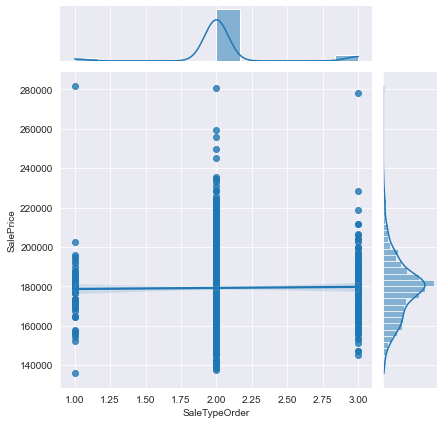

In [312]:
#Sale Type ordered by price

train['SaleTypeOrder'] = train['SaleType']
train_ordinal_str_columns = train[['SaleTypeOrder']]
dict_ordinal = {
 'ConLw':1,
 'NA':0,
 'Oth':1,
 'ConLD':1,
 'COD':1,
 'WD':2,
 'WD ':2,
 'CWD':3,
 'ConLI':3,
 'Con':3,
 'New':3
 }
#loop to get the job done
for i in train_ordinal_str_columns.columns:
 train.replace({i: dict_ordinal},inplace = True)
#this has a linear r-ship
sns.jointplot(x=train['SaleTypeOrder'],y=train['SalePrice'],kind='reg');

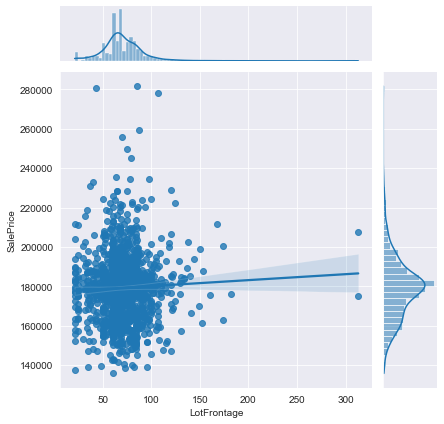

In [316]:
sns.jointplot(x=train['LotFrontage'],y=train['SalePrice'],kind='reg');

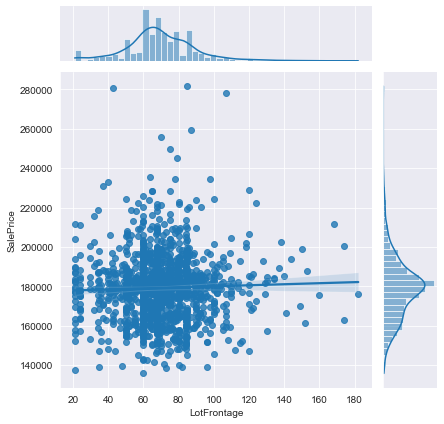

In [329]:
# Remove some of the lot frontage outliers
x_frontage = train[train['LotFrontage'] < 250]

sns.jointplot(x=x_frontage['LotFrontage'],y=x_frontage['SalePrice'],kind="reg")

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

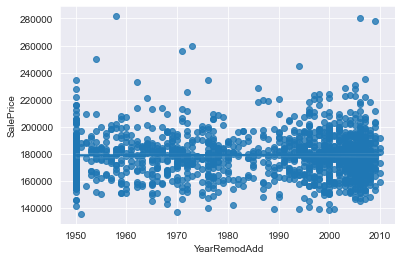

In [330]:
sns.regplot(x=train['YearRemodAdd'],y=train['SalePrice'])

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

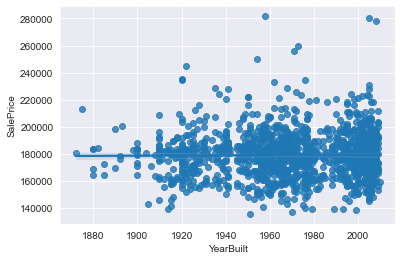

In [331]:
sns.regplot(x=train['YearBuilt'],y=train['SalePrice'])

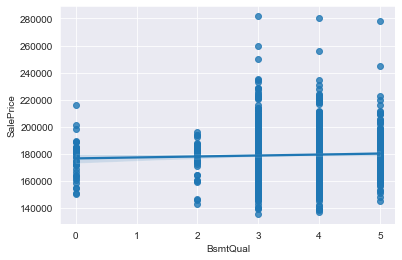

In [332]:
train['BasementOverall'] = train['BsmtQual'] *train['BsmtExposure'] #an overall score of basement quality in ceiling height and access to outside
sns.regplot(x=train['BsmtQual'],y=train['SalePrice']);

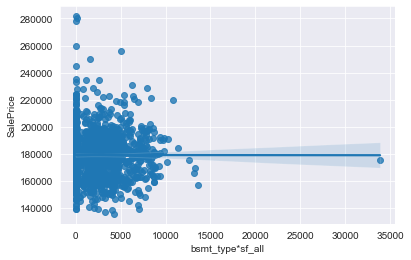

In [333]:
# make variable that gives home buyer an estimate of finished basement square footage to house square footage

train['bsmt_type*sf_all'] = (train['BsmtFinType1']*train['BsmtFinSF1']) + (train['BsmtFinType2']*train['BsmtFinSF2']) #quality*sf interaction variable. Clear outliers
sns.regplot(x=train['bsmt_type*sf_all'],y=train['SalePrice']);

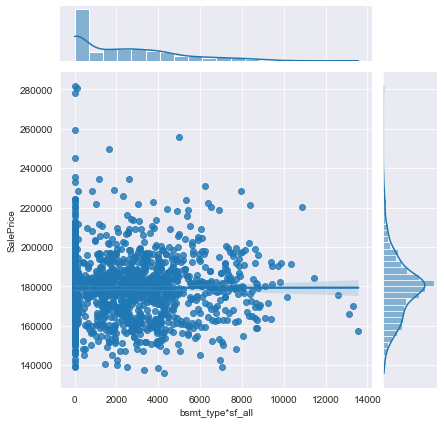

In [337]:
# Remove outlier and run jointplot again
x_bsmt_typesf_all = train[train['bsmt_type*sf_all'] < 15000]
sns.jointplot(x=x_bsmt_typesf_all['bsmt_type*sf_all'],y=x_bsmt_typesf_all['SalePrice'],kind="reg")

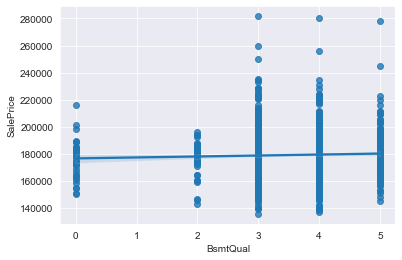

In [338]:
sns.regplot(x=train['BsmtQual'],y=train['SalePrice']); 

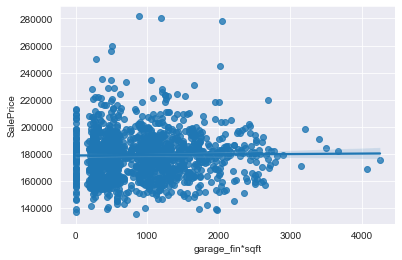

In [339]:
# Similar idea from before, creat feature examine garage finish to garage area
train['garage_fin*sqft'] = train['GarageArea']*train['GarageFinish'] 
sns.regplot(x=train['garage_fin*sqft'],y=train['SalePrice']);

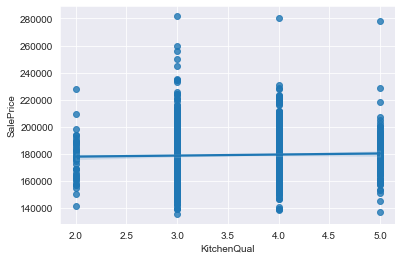

In [340]:
sns.regplot(x=train['KitchenQual'],y=train['SalePrice']);

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

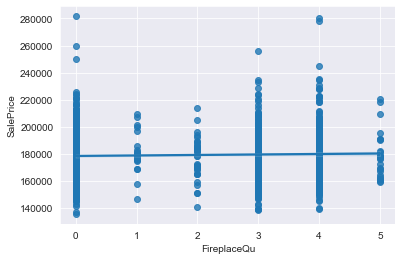

In [341]:
sns.regplot(x=train['FireplaceQu'],y=train['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

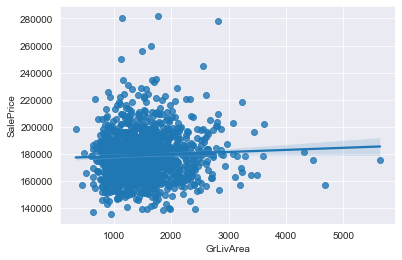

In [342]:
sns.regplot(x=train['GrLivArea'],y=train['SalePrice'])

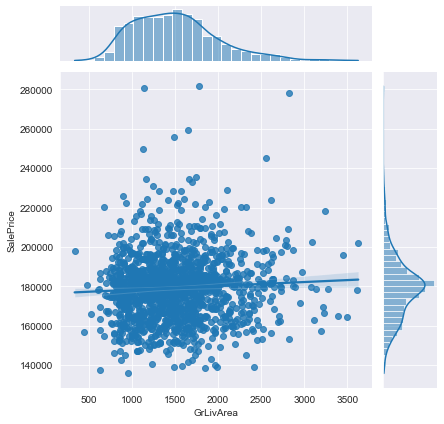

In [343]:
x_gr_liv_area = train[train['GrLivArea'] < 4000]
sns.jointplot(x=x_gr_liv_area['GrLivArea'],y=x_gr_liv_area['SalePrice'],kind="reg")

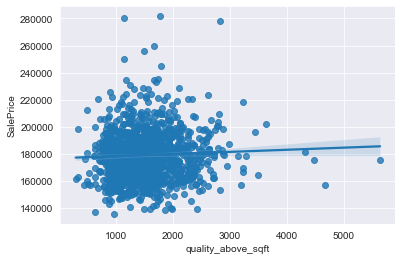

In [345]:
# Building a feature to compare quality finished space compared to low quality finished space
train['quality_above_sqft'] = (train['1stFlrSF']+train['2ndFlrSF']) - train['LowQualFinSF']

sns.regplot(x=train['quality_above_sqft'],y=train['SalePrice']);

In [347]:
train[train['1stFlrSF']>3500]

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,YrSold,SaleType,SaleCondition,SalePrice.1,NeighborhoodOrder,SaleTypeOrder,BasementOverall,bsmt_type*sf_all,garage_fin*sqft,quality_above_sqft
1298,1299,175231.1897,60,RL,313.0,63887,Pave,NA,1,Bnk,...,2008,New,Partial,160000,1,3,20,33864,4254,5642


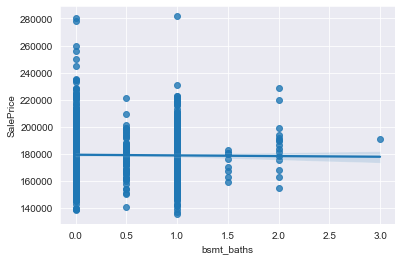

In [348]:
# make feature to combine basement baths 

train['bsmt_baths'] = train['BsmtFullBath']+(train['BsmtHalfBath']/2)
sns.regplot(x=train['bsmt_baths'],y=train['SalePrice']);

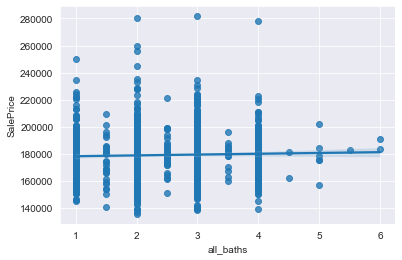

In [349]:
# make feature to combine all baths 

train['all_baths'] = train['HalfBath'] + train['FullBath'] + train['bsmt_baths']
sns.regplot(x=train['all_baths'],y=train['SalePrice']);

In [351]:
train[train['all_baths'] == 6] 

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,SaleCondition,SalePrice.1,NeighborhoodOrder,SaleTypeOrder,BasementOverall,bsmt_type*sf_all,garage_fin*sqft,quality_above_sqft,bsmt_baths,all_baths
738,739,191215.0887,90,RL,60.0,10800,Pave,NA,4,Lvl,...,Alloca,179000,1,2,16,7200,0,1200,3.0,6.0
921,922,183621.5088,90,RL,67.0,8777,Pave,NA,4,Lvl,...,Normal,145900,1,2,3,5420,0,2200,2.0,6.0


In [352]:
# Dissecting bedroom feature for homes to look for any potential patterns
train.groupby('BedroomAbvGr')['SalePrice'].agg(['mean','count'])

,mean,count
BedroomAbvGr,,
0,182660.078883,6
1,177674.884730,50
2,179148.325749,358
3,178762.825302,804
4,181342.396996,213
5,178920.529119,21
6,179229.183586,7
8,164810.609500,1


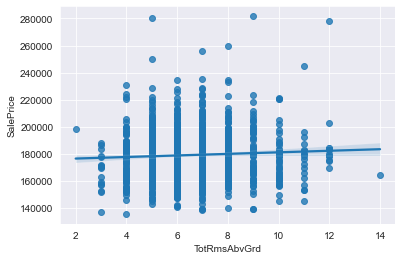

In [354]:
sns.regplot(x=train['TotRmsAbvGrd'],y=train['SalePrice']);

<AxesSubplot:xlabel='room_size', ylabel='SalePrice'>

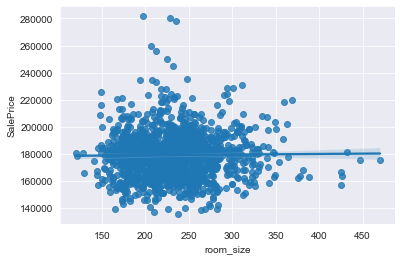

In [356]:
# A feature comparing overall room size to price

train['room_size'] = train['GrLivArea'] / (train['TotRmsAbvGrd'])
sns.regplot(x=train['room_size'],y=train['SalePrice'])

In [357]:
train.groupby('room_size')['SalePrice'].agg(['mean'])

,mean
room_size,
120.000000,180770.6498
121.000000,178344.6245
129.000000,181012.1414
130.000000,165845.9386
141.600000,175079.3288
...,...
425.400000,166548.0672
426.400000,163753.0871
431.600000,181150.5517


In [358]:
train['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

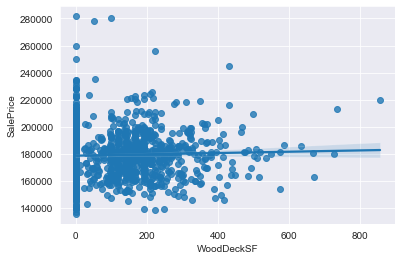

In [360]:
#looking at exterior features 
sns.regplot(x=train['WoodDeckSF'],y=train['SalePrice']); 

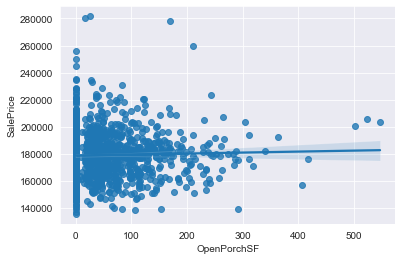

In [362]:
sns.regplot(x=train['OpenPorchSF'],y=train['SalePrice']);

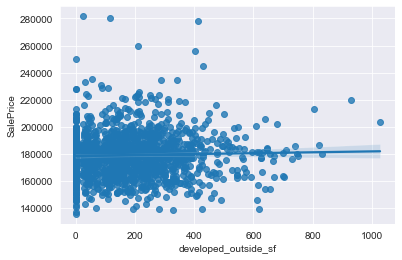

In [363]:
#combine different porches. Trying to measure developed outside space for houses. 
train['developed_outside_sf'] = train['OpenPorchSF']+ train['ScreenPorch'] + train['EnclosedPorch'] +train['3SsnPorch'] +train['WoodDeckSF'] 
sns.regplot(x=train['developed_outside_sf'],y=train['SalePrice']);

In [364]:
# Houses usually sold in warmer months
train.groupby('MoSold')['SalePrice'].agg(['mean', 'count']).sort_values(by = 'count') 

,mean,count
MoSold,,
2,183203.668142,52
1,177905.331343,58
12,178143.885603,59
9,180809.456176,63
11,185079.937006,79
10,178288.121425,89
3,179263.377436,106
8,177945.197171,122
4,177568.118095,141


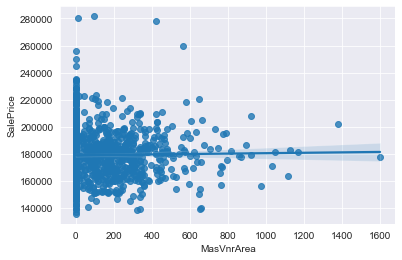

In [365]:
train['MasVnrArea']
sns.regplot(x=train['MasVnrArea'],y=train['SalePrice']);

In [366]:

train.groupby('MasVnrArea')['SalePrice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
MasVnrArea,,
651.0,139214.9522,1
64.0,140791.9225,1
286.0,145291.2450,1
299.0,149315.3119,1
230.0,151520.3816,1
...,...,...
244.0,221134.5336,1
424.0,229047.6089,2
95.0,231508.7963,2


In [367]:
train['mas_vnr_type_dummy'] = train['MasVnrArea']
ames_ordinal_str_columns = train[['mas_vnr_type_dummy']]
dict_ordinal = {
   'None':0,
    'BrkCmn':0,
    'CBlock':0,
    'BrkFace':1,
    'Stone':1,   
        }
#loop to get the job done
for i in train_ordinal_str_columns.columns:
    train.replace({i: dict_ordinal},inplace = True)

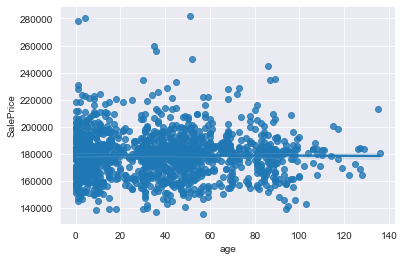

In [369]:
#age of house at time of sale
train['age'] = train['YrSold'] - train['YearBuilt'] 
sns.regplot(x=train['age'],y=train['SalePrice']);

In [370]:
train['was_remodeled'] =  train['YearRemodAdd'] - train['YearBuilt'] 
train['was_remodeled'] = [1 if i > 0 else 0 for i in train['was_remodeled']];

In [373]:
train.groupby('MSZoning')['SalePrice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
MSZoning,,
RH,176200.298913,16
RM,177164.494954,218
FV,178271.809720,65
C (all),179340.757110,10
RL,179687.796309,1151


In [374]:
# Does zoning matter for home prices?
train['is_residential'] = train['MSZoning']
ames_ordinal_str_columns = train[['is_residential']]
dict_ordinal = {
   'A (agr)':0,
    'I (all)':0,
    'C (all)':0,
    'RM':1,
    'RH':1,
    'RL':1,
    'FV':1,
        }
#loop to get the job done
for i in train_ordinal_str_columns.columns:
    train.replace({i: dict_ordinal},inplace = True)

In [376]:
#2 if by positive feature, 1 if normal, 0 if negative feature. 
train['exterior_ordinal1'] = train['Exterior1st']
train['exterior_ordinal2'] = train['Exterior2nd']
train_ordinal_str_columns = train[['exterior_ordinal2', 'exterior_ordinal1']]
dict_ordinal = {
     'AsphShn':1,
    'CBlock':1,
    'AsbShng':1,
    'Brk Cmn':2,
    'BrkComm':2,
     'Stucco':2,
    'PreCast':2,
    'Other':3,
    'Wd Shng':3,
    'Wd Sdng':3,
    'MetalSd':3,
    'WdShing':3,
    'HdBoard':3,      
    'Plywood':4,
    'BrkFace':5,       
    'VinylSd':5,
    'CmentBd':5,
    'CemntBd':5,
    'Stone':5,    
    'ImStucc':5,        
        }
#loop to get the job done
for i in train_ordinal_str_columns.columns:
    train.replace({i: dict_ordinal},inplace = True)
train['external_feature'] = train['exterior_ordinal1'] + train['exterior_ordinal2']
train.groupby('Exterior1st')['SalePrice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
Exterior1st,,
ImStucc,159056.890200,1
CBlock,160312.319600,1
Stone,175213.157250,2
AsbShng,175634.804170,20
CemntBd,175989.584767,61
Plywood,178810.139154,108
Wd Sdng,178846.554483,206
MetalSd,178884.198051,220
VinylSd,179501.393828,515


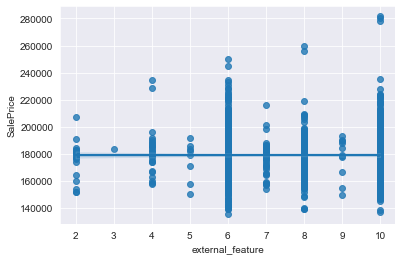

In [377]:
sns.regplot(x=train['external_feature'],y=train['SalePrice']);

In [378]:
# Check over the house styles, change string columns 
train['house_style_condensed'] = train['HouseStyle'] 
train_ordinal_str_columns = train[['house_style_condensed']]
dict_ordinal = {
    '1.5Unf':1.5,
    '1.5Fin':1.5,
    'SFoyer':1.5,
    'SLvl':1,
    '1Story':1,
     '2.5Unf':2,
    '2Story':2,
    '2.5Fin':2    
        }
#loop to get the job done
for i in train_ordinal_str_columns.columns:
    train.replace({i: dict_ordinal},inplace = True)
#dummy building type
train = pd.get_dummies(data = train, columns=['house_style_condensed'], drop_first=True)
train.groupby('HouseStyle')['SalePrice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
HouseStyle,,
SFoyer,170575.099651,37
1.5Unf,176057.649864,14
2.5Unf,176728.352327,11
2Story,178885.432120,445
1.5Fin,179265.377312,154
SLvl,179637.063445,65
1Story,179864.310003,726
2.5Fin,181739.023825,8


In [379]:
train.groupby('BldgType')['SalePrice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
BldgType,,
2fmCon,174599.841497,31
Twnhs,177500.922772,43
1Fam,179240.295255,1220
TwnhsE,180054.043942,114
Duplex,180737.258663,52


In [381]:
#dummy building type
train = pd.get_dummies(data = train, columns=['BldgType'], drop_first=True)

In [382]:
train.groupby('RoofStyle')['SalePrice'].agg(['mean', 'count']).sort_values(by = 'mean') 

,mean,count
RoofStyle,,
Shed,171384.339600,2
Gambrel,178922.478809,11
Gable,179032.154260,1141
Hip,179470.648154,286
Mansard,182807.276271,7
Flat,188302.551892,13


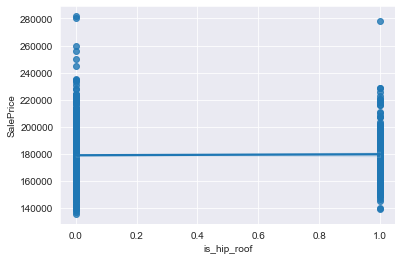

In [387]:
# dummy for hip/nicer roof styles
train['is_hip_roof'] = train['RoofStyle'] 
train_ordinal_str_columns = train[['is_hip_roof']]
dict_ordinal = {
 'Gambrel':0,
 'Mansard':0,
 'Gable':0,
 'Flat':1,
 'Shed':1,
 'Hip':1, 
 }
#loop to get the job done
for i in train_ordinal_str_columns.columns:
 train.replace({i: dict_ordinal},inplace = True)
sns.regplot(x=train['is_hip_roof'],y=train['SalePrice']);

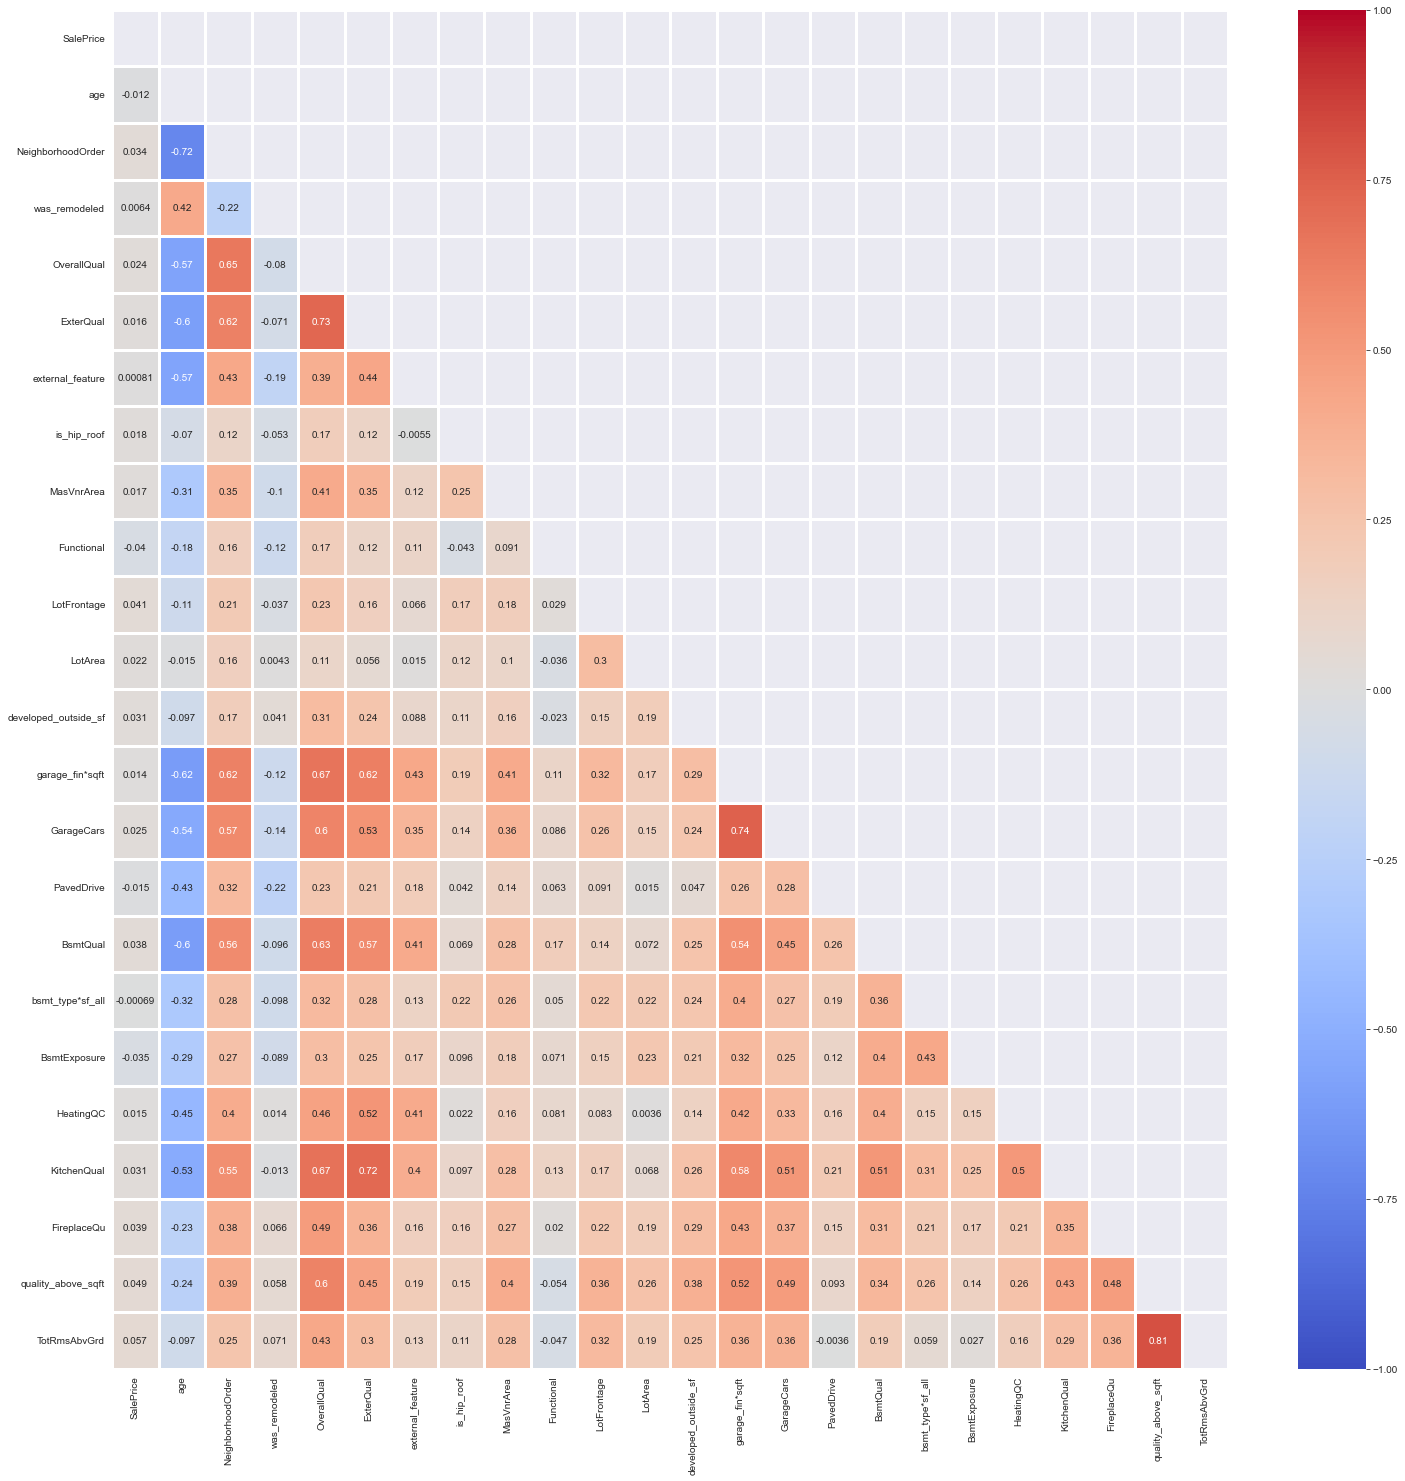

In [392]:
train_eval =  train[['SalePrice',
                     'age',
                     'NeighborhoodOrder',
                     'was_remodeled',
                     'OverallQual', 
                     'ExterQual',
                     'external_feature',
                     'is_hip_roof',
                     'MasVnrArea',  
                  'Functional',
                     'LotFrontage',
                     'LotArea',
                     'developed_outside_sf'
                  ,'garage_fin*sqft',
                     'GarageCars',
                     'PavedDrive',
                 'BsmtQual',
                     'bsmt_type*sf_all',
                     'BsmtExposure',
                 'HeatingQC',
                     'KitchenQual',
                     'FireplaceQu', 
                 'quality_above_sqft',
                     'TotRmsAbvGrd',]]    
mask = np.zeros_like(train_eval.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25,25))
sns.heatmap(train_eval.corr(),
            cmap='coolwarm',
            annot=True,
            mask=mask,
            linewidths=2.5,
            vmin=-1,
            vmax=1,       
                
);

In [393]:
train['SalePrice'].describe().T

count      1460.000000
mean     179207.392765
std       16536.984570
min      135751.318900
25%      168709.480650
50%      179221.296050
75%      186825.944300
max      281643.976100
Name: SalePrice, dtype: float64

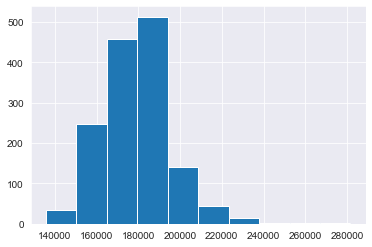

In [395]:
#there are definite outliers 
train['SalePrice'].hist();

In [396]:
#3 stdevs from the mean 
print(f'Four + stdevs from mean {(16536.98*4)+179207.39}. Where max is 281643.98')
print(f'Three - stdevs from mean {(-16536.98*3)+179207.39}. Where min is 135751.32')

Four + stdevs from mean 245355.31. Where max is 281643.98
Three - stdevs from mean 129596.45000000001. Where min is 135751.32


In [400]:
train[(train['SalePrice'] > 250000)]

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,exterior_ordinal1,exterior_ordinal2,external_feature,house_style_condensed_1.5,house_style_condensed_2.0,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,is_hip_roof
487,488,255629.4905,20,RL,70.0,12243,Pave,NA,3,Lvl,...,4,4,8,0,0,0,0,0,0,0
728,729,281643.9761,90,RL,85.0,11475,Pave,NA,4,Lvl,...,5,5,10,0,0,0,1,0,0,0
790,791,280618.1326,120,RL,43.0,3182,Pave,NA,4,Lvl,...,5,5,10,0,0,0,0,0,1,0
803,804,277936.1269,60,RL,107.0,13891,Pave,NA,4,Lvl,...,5,5,10,0,1,0,0,0,0,1
1336,1337,259423.8591,90,RL,87.0,9246,Pave,NA,3,Lvl,...,4,4,8,0,0,0,1,0,0,0


In [410]:
# Drop these from these over 4 stdevs from mean
train = train[train['Id'] != 487]
train = train[train['Id'] != 728]
train = train[train['Id'] != 790]
train = train[train['Id'] != 803]
train = train[train['Id'] != 1336]


In [408]:
train[(train['YearBuilt']<1885)]

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,exterior_ordinal1,exterior_ordinal2,external_feature,house_style_condensed_1.5,house_style_condensed_2.0,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,is_hip_roof
304,305,164575.9823,75,RM,87.0,18386,Pave,NA,4,Lvl,...,5,5,10,0,1,0,0,0,0,0
630,631,183962.5510,70,RM,50.0,9000,Pave,Grvl,4,Lvl,...,5,5,10,0,1,0,0,0,0,0
747,748,183653.8909,70,RM,65.0,11700,Pave,Pave,3,Lvl,...,2,2,4,0,1,0,0,0,0,0
991,992,184522.3692,70,RM,121.0,17671,Pave,Grvl,4,Lvl,...,3,3,6,0,1,0,0,0,0,0
1132,1133,168743.0016,70,RM,90.0,9900,Pave,NA,4,Lvl,...,3,3,6,0,1,0,0,0,0,0
1137,1138,213252.9269,50,RL,54.0,6342,Pave,NA,4,Lvl,...,5,5,10,1,0,0,0,0,0,0
1349,1350,180983.4438,70,RM,50.0,5250,Pave,Pave,4,Lvl,...,3,3,6,0,1,0,0,0,0,0


In [411]:
# drop these from being older that four stdevs of the mean
train = train[train['Id'] != 304]
train = train[train['Id'] != 630]
train = train[train['Id'] != 747]
train = train[train['Id'] != 991]
train = train[train['Id'] != 1132]
train = train[train['Id'] != 1137]
train = train[train['Id'] != 1349]

In [412]:
#drop these from having too large of a square footage disproportionate to price
train = train[train['Id'] != 1299]
train = train[train['Id'] != 524]
train = train[train['Id'] != 1183]
train = train[train['Id'] != 692]

In [414]:
train_eval = train[[ 'SalePrice',
                     'age',
                     'NeighborhoodOrder',
                     'was_remodeled',
                     'OverallQual', 
                     'ExterQual',
                     'external_feature',
                     'is_hip_roof',
                     'MasVnrArea',  
                  'Functional',
                     'LotFrontage',
                     'LotArea',
                     'developed_outside_sf'
                  ,'garage_fin*sqft',
                     'GarageCars',
                     'PavedDrive',
                 'BsmtQual',
                     'bsmt_type*sf_all',
                     'BsmtExposure',
                 'HeatingQC',
                     'KitchenQual',
                     'FireplaceQu', 
                 'quality_above_sqft',
                     'TotRmsAbvGrd',]]  




In [418]:
#copy cleaned dataset, the final iteration 
train_eval.to_csv('/Users/erjonhome/Desktop/train_eval.csv', index = False)

In [419]:
import pickle
import importlib.util
package_name = 'scikit-misc'
spec = importlib.util.find_spec(package_name)
if spec is None:
    import os
os.system(f"pip install scikit-misc")

0

In [451]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV,ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
import scipy

In [425]:
train_clean = pd.read_csv ('/Users/erjonhome/Desktop/train_eval.csv')

In [426]:
train_clean.shape

(1444, 24)

In [431]:
train_clean['y_niave'] = train_clean['SalePrice'].mean()
MRSE = metrics.mean_squared_error(y_true=train_clean['SalePrice'], y_pred=train_clean['y_niave'] )**.5
print(f'Mean Root Square Error = {round(MRSE,2)}.')

Mean Root Square Error = 16580.84.


In [436]:
def prepare_data_for_modeling(model_dataframe):
    #create X and y variables
    X = train_clean.drop(columns=['SalePrice', 'y_niave'])
    y = train_clean['SalePrice']
    #split into training and test groups
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2, train_size = .8)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = prepare_data_for_modeling(train_clean)

In [437]:
# Unscaled linear regression

def linear_regression():   
    #Instantiate, fit and score 
    lr = LinearRegression()
    lr.fit(X=X_train, y=y_train)
    train =  print(f' Unscaled Linear Regression training R^2: {round(lr.score(X=X_train, y=y_train),4)}'), 
    test = print(f' Unscaled Linear Regression test R^2: {round(lr.score(X_test, y_test),4)}')
    return train, test   
linear_regression()

 Unscaled Linear Regression training R^2: 0.0154
 Unscaled Linear Regression test R^2: -0.0156


((None,), None)

In [441]:
X=X_train
y=y_train
result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3630.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):                        0.00
Time:                        21:32:50   Log-Likelihood:                         -13125.
No. Observations:                1155   AIC:                                  2.630e+04
Df Residuals:                    1132   BIC:                                  2.641e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [442]:
# Scaled Linear Regression

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
lr_stan = LinearRegression()
lr_stan.fit(Z_train, y_train)
print(f' Scaled Linear Regression training R^2 score: {round(lr_stan.score(Z_train, y_train),4)}')
print(f' Scaled Linear Regression test R^2 score: {round(lr_stan.score(Z_test, y_test),4)}')

 Scaled Linear Regression training R^2 score: 0.0154
 Scaled Linear Regression test R^2 score: -0.0156


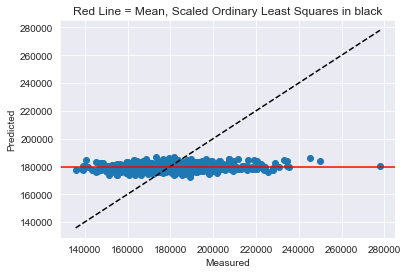

In [449]:
y_preds = lr_stan.predict(Z_train)
fig, ax = plt.subplots()
ax.scatter(y_train, y_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Red Line = Mean, Scaled Ordinary Least Squares in black")
plt.show()

In [453]:
# Calculate skew of all columns of the Model Dataframe
train_clean.skew(axis = 0, skipna = True)

SalePrice                0.925390
age                      0.600934
NeighborhoodOrder        0.107160
was_remodeled            0.086041
OverallQual              0.185470
ExterQual                0.821661
external_feature        -0.159335
is_hip_roof              1.457842
MasVnrArea               2.666419
Functional              -3.396818
LotFrontage              1.625288
LotArea                 12.542515
developed_outside_sf     1.109042
garage_fin*sqft          0.922013
GarageCars              -0.336852
PavedDrive              -3.286065
BsmtQual                -1.299238
bsmt_type*sf_all         0.996163
BsmtExposure             1.118908
HeatingQC               -0.542164
KitchenQual              0.382453
FireplaceQu              0.112980
quality_above_sqft       0.710769
TotRmsAbvGrd             0.659146
y_niave                  0.000000
dtype: float64

In [457]:
train_clean['price_log'] = np.log(train_clean['SalePrice'])

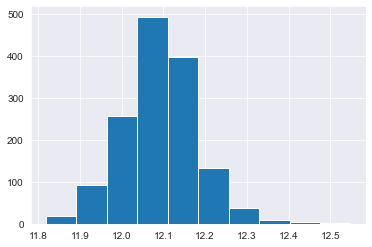

In [458]:
train_clean['price_log'].hist();

In [460]:
train_clean.skew(axis = 0, skipna = True)

SalePrice                0.925390
age                      0.600934
NeighborhoodOrder        0.107160
was_remodeled            0.086041
OverallQual              0.185470
ExterQual                0.821661
external_feature        -0.159335
is_hip_roof              1.457842
MasVnrArea               2.666419
Functional              -3.396818
LotFrontage              1.625288
LotArea                 12.542515
developed_outside_sf     1.109042
garage_fin*sqft          0.922013
GarageCars              -0.336852
PavedDrive              -3.286065
BsmtQual                -1.299238
bsmt_type*sf_all         0.996163
BsmtExposure             1.118908
HeatingQC               -0.542164
KitchenQual              0.382453
FireplaceQu              0.112980
quality_above_sqft       0.710769
TotRmsAbvGrd             0.659146
y_niave                  0.000000
price_log                0.376608
dtype: float64

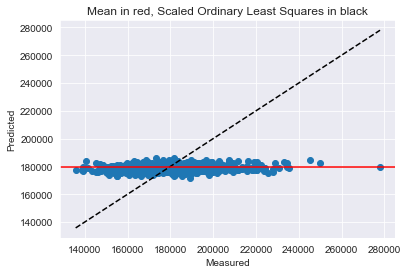

In [462]:
# Perform the same actions for linear regression but with log values

X_log = train_clean.drop(columns=['SalePrice', 'y_niave', 'price_log'])
y_log = train_clean['price_log']
#split into training and test groups
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state = 42, test_size=.2, train_size = .8)
#Instantiate, fit and score 
lr_logg = LinearRegression()
lr_logg.fit(X=X_train_log, y=y_train_log)
preds_log = lr_logg.predict(X_train)
price_log_to_norm = np.exp(preds_log)
fig, ax = plt.subplots()
ax.scatter(y_train, price_log_to_norm)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Scaled Ordinary Least Squares in black")
plt.show()

In [463]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=price_log_to_norm )**.5
print(f'Mean Root Square Error in dollars for log transformed target: {round(MRSE,2)}.')

Mean Root Square Error in dollars for log transformed target: 16046.91.


In [464]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 16030.45.


In [465]:
# Set up a list of ridge alphas to check then convert them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);
# Here is the optimal value of alpha
ridge_cv.alpha_


22051.307399030455

In [466]:
print(f' RidgeCV Regression training R^2 score: {round(ridge_cv.score(Z_train, y_train),4)}')
print(f' RidgeCV Regression test R^2 score: {round(ridge_cv.score(Z_test, y_test),4)}')

 RidgeCV Regression training R^2 score: 0.0016
 RidgeCV Regression test R^2 score: -0.001


In [467]:
ridge_preds = ridge_cv.predict(Z_train)
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=ridge_preds )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 16141.98.


In [468]:
# Set up a list of Lasso alphas to go over this model 

l_alphas = np.logspace(-3, 3, 500)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=10000)
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);
#best found alpha
lasso_cv.alpha_

870.7224849239922

In [469]:
print(f' LassoCV Regression training R^2 score: {round(lasso_cv.score(Z_train, y_train),4)}')
print(f' LassoCV Regression test R^2 score: {round(lasso_cv.score(Z_test, y_test),4)}')

 LassoCV Regression training R^2 score: 0.0014
 LassoCV Regression test R^2 score: -0.0028


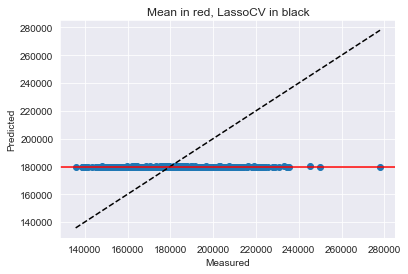

In [470]:
y_preds = lasso_cv.predict(Z_train)
fig, ax = plt.subplots()
ax.scatter(y_train, y_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, LassoCV in black")
plt.show()

In [471]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 16144.0.


In [480]:
# run a non-grid search Lasso regression

lasso_sc = StandardScaler()
lasso_Z_train = lasso_sc.fit_transform(X_train)
lasso_Z_test = lasso_sc.fit_transform(X_test)
lasso_coef_eval = Lasso(alpha = 145.60059950206485, max_iter=5000)
lasso_coef_eval.fit(lasso_Z_train, y_train)
print(f'Lasso R^2 Cross Validated Score: {round(cross_val_score(lasso_coef_eval, lasso_Z_train, y_train).mean(),4)}')
print(lasso_coef_eval.intercept_)
project_model = pd.DataFrame(list(zip(X_train.columns, lasso_coef_eval.coef_)))
project_model

Lasso R^2 Cross Validated Score: -0.0148
179411.25953696968


,0,1
0,age,0.000000
1,NeighborhoodOrder,-203.574829
2,was_remodeled,-106.440493
3,OverallQual,-0.000000
4,ExterQual,-0.000000
5,external_feature,-164.490964
6,is_hip_roof,0.000000
7,MasVnrArea,0.000000
8,Functional,-931.456068
9,LotFrontage,286.750995


In [481]:
pickle.dump(lasso_coef_eval, open('model_ames.p', 'wb'))